In [1]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [2]:
classifier('this is amazing')

[{'label': 'POSITIVE', 'score': 0.9998784065246582}]

In [2]:
from pathlib import Path

def read_imdb_split(split_dir):
    split_dir = Path(split_dir)
    texts = []
    labels = []
    for label_dir in ["pos", "neg"]:
        for text_file in (split_dir/label_dir).iterdir():
            texts.append(text_file.read_text())
            labels.append(0 if label_dir is "neg" else 1)

    return texts, labels

train_texts, train_labels = read_imdb_split('/data/aclimdb/train')
test_texts, test_labels = read_imdb_split('/data/aclimdb/test')

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_639/3871364295.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  labels.append(0 if label_dir is "neg" else 1)


In [3]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)

In [4]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [5]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [6]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

2021-10-01 19:27:18.047163: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=1
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=192
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=1
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER=

In [7]:

from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps=1
)

with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

a = trainer.train()



Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

2021-10-01 19:28:13.343321: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
OMP: Info #211: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #209: KMP_AFFINITY: Affinity capable, using global cpuid leaf 11 info
OMP: Info #154: KMP_AFFINITY: Initial OS proc set respected: 0-47
OMP: Info #156: KMP_AFFINITY: 48 available OS procs
OMP: Info #157: KMP_AFFINITY: Uniform topology
OMP: Info #179: KMP_AFFINITY: 1 packages x 24 cores/pkg x 2 threads/core (24 total cores)
OMP: Info #213: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #171: KMP_AFFINITY: OS proc 0 maps to package 0 core 0 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 24 maps to package 0 core 0 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 1 maps to package 0 core 1 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 25 maps to package 0 core 1 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 2 maps to package 0 core 2 thread

In [8]:
trainer.save_model()

In [35]:
import random
import numpy as np
b=[]
buffer = range(-10,10)
for i in np.linspace(10,100,300):
    a = i + random.choice(buffer)
    if a != 0:
        print(1/(a))
        b.append(1/(a))
        
    
    

0.25
0.10751528227256382
0.06023368251410153
0.20395634379263297
0.07040263715563927
0.1816524908869988
0.050489699425869644
0.14070588235294118
0.08059299191374662
0.21235795454545453
0.049974928965401975
0.04923431582413963
0.15123925139099648
0.1121951219512195
0.07035294117647059
0.11743912018853103
0.20763888888888887
0.0661504424778761
0.05429453422916288
0.05342147579060211
0.0665775996437319
0.049210006583278475
0.06838975297346751
0.09154929577464789
0.07561962569549824
0.0950111217032094
0.08455882352941174
0.07617834394904457
0.11865079365079366
0.03606320106139187
0.03567593365946784
0.05769972983404092
0.03492582642214694
0.03579980842911877
0.03420661251573046
0.05702841884417319
0.03351642192579307
0.0551355338373594
0.054235443497188465
0.08518518518518518
0.04340252576571345
0.06972947761194029
0.03617664851784634
0.05902092380576391
0.03419487648673376
0.030726544034528826
0.034666666666666665
0.039765926319989355
0.05141874462596732
0.03738434608652163
0.033277685030

In [28]:
from matplotlib import pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


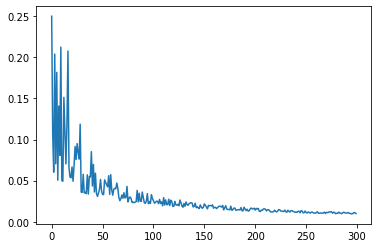

In [36]:
plt.plot(b)